In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
df = pd.read_csv('data/actual_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


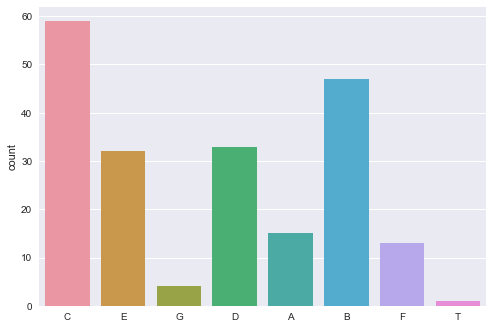

In [71]:
sns.countplot([i[0] for i in list(df.Cabin.dropna())])

In [75]:
df.Cabin.dropna().size

204

In [76]:
df['mc'] = df.Cabin.isnull()
cor = df.corr()

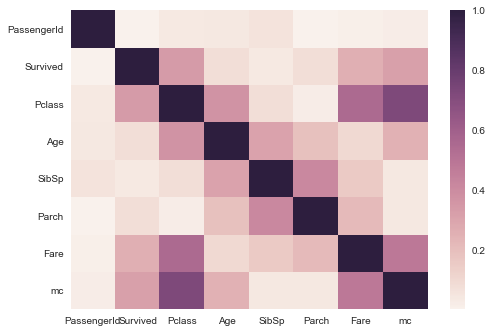

In [79]:
sns.heatmap(cor.abs())

In [81]:
df.groupby('Pclass')['mc'].sum()

Pclass
1     40.0
2    168.0
3    479.0
Name: mc, dtype: float64

In [91]:
df.loc[(df['Pclass']== 3) & (~df['Cabin'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mc
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,False
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,False
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,False
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,False
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,False
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,False
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,False
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,False
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,False


In [3]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [4]:
round(df.Age.mean())

30

In [5]:
df.Age.fillna(value=round(df.Age.mean()),inplace=True)

In [6]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df.Cabin.unique().size

148

In [8]:
df.Cabin.size
#UNIQUE SIGNIFICANTLY LOWER THAN total size hence it is safe to assume that the same cabin had been assigned 
#to multiple passengers.

891

In [9]:
df.Cabin.mode()
#tells us which cabins were most assigned

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [10]:
for x in range(df.Cabin.size):
    rep = np.random.choice(['B96','C23','C25','B98','C27','G6'])
    if pd.isnull(df.Cabin[x]):
        df.set_value(x,'Cabin',rep)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C27,S


In [12]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [13]:
df.mode().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,30.0,0.0,0.0,1601,8.05,C27,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,NaN,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.Embarked.fillna(value=str(df.Embarked.mode()),inplace=True)

In [15]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C27,S


In [17]:
females = df.loc[df['Sex'] == 'female']
females.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C23,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


In [18]:
males = df.loc[df['Sex'] == 'male']
males.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C27,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,B96,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C25,S


In [19]:
Firstm = males.loc[males['Pclass']== 1]
Secondm = males.loc[males['Pclass']== 2]
Thirdm = males.loc[males['Pclass']== 3]
Firstf = females.loc[females['Pclass']== 1]
Secondf = females.loc[females['Pclass']== 2]
Thirdf = females.loc[females['Pclass']== 3]

In [20]:
dead = df.loc[df['Survived']==0]
alive = df.loc[df['Survived']==1]

In [21]:
deadmen = dead.loc[dead['Sex']=='male']
deadwomen = dead.loc[dead['Sex']=='female']

In [22]:
Firstmd = deadmen.loc[deadmen['Pclass']== 1]
Secondmd = deadmen.loc[deadmen['Pclass']== 2]
Thirdmd = deadmen.loc[deadmen['Pclass']== 3]
Firstfd = deadwomen.loc[deadwomen['Pclass']== 1]
Secondfd = deadwomen.loc[deadwomen['Pclass']== 2]
Thirdfd = deadwomen.loc[deadwomen['Pclass']== 3]

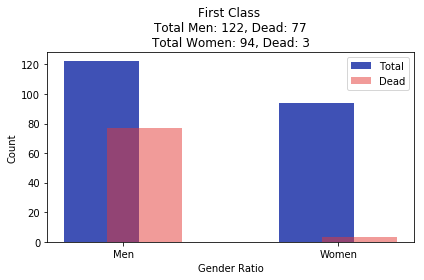

In [23]:
# data to plot
n_groups = 2
Alive = (Firstm.PassengerId.count(),Firstf.PassengerId.count(),)
Dead = (Firstmd.PassengerId.count(), Firstfd.PassengerId.count(),)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Alive, bar_width,
                 alpha=1,
                 color='#3F51B5',
                 label='Total')
 
rects2 = plt.bar(index+0.2, Dead, bar_width,
                 alpha=0.5,
                 color='#E53935',
                 label='Dead')
 
plt.xlabel('Gender Ratio')
plt.ylabel('Count')
plt.title('First Class \n'+'Total Men: {}, Dead: {}\n'.format(Firstm.PassengerId.count(),Firstmd.PassengerId.count())+'Total Women: {}, Dead: {}'.format(Firstf.PassengerId.count(),Firstfd.PassengerId.count()))
plt.xticks(index+0.1, ('Men','Women'))
plt.legend()
 
plt.tight_layout()
plt.show()

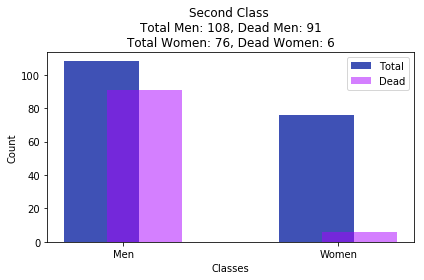

In [24]:
# data to plot
n_groups = 2
Alive = (Secondm.PassengerId.count(),Secondf.PassengerId.count(),)
Dead = (Secondmd.PassengerId.count(), Secondfd.PassengerId.count(),)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Alive, bar_width,
                 alpha=1,
                 color='#3F51B5',
                 label='Total')
 
rects2 = plt.bar(index+0.2, Dead, bar_width,
                 alpha=0.5,
                 color='#AA00FF',
                 label='Dead')
 
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Second Class \n'+'Total Men: {}, Dead Men: {}\n'.format(Secondm.PassengerId.count(),Secondmd.PassengerId.count())+'Total Women: {}, Dead Women: {}'.format(Secondf.PassengerId.count(),Secondfd.PassengerId.count()))
plt.xticks(index+0.1, ('Men','Women'))
plt.legend()
 
plt.tight_layout()
plt.show()

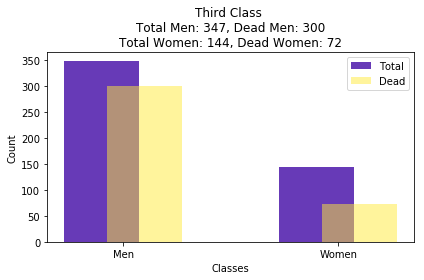

In [25]:
# data to plot
n_groups = 2
Alive = (Thirdm.PassengerId.count(),Thirdf.PassengerId.count(),)
Dead = (Thirdmd.PassengerId.count(), Thirdfd.PassengerId.count(),)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Alive, bar_width,
                 alpha=1,
                 color='#673AB7',
                 label='Total')
 
rects2 = plt.bar(index+0.2, Dead, bar_width,
                 alpha=0.5,
                 color='#FFEB3B',
                 label='Dead')
 
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Third Class \n'+'Total Men: {}, Dead Men: {}\n'.format(Thirdm.PassengerId.count(),Thirdmd.PassengerId.count())+'Total Women: {}, Dead Women: {}'.format(Thirdf.PassengerId.count(),Thirdfd.PassengerId.count()))
plt.xticks(index+0.1, ('Men','Women'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C27,S


In [27]:
dfDead = df.loc[df['Survived']==1]
dfAlive = df.loc[df['Survived']==0]

In [28]:
dfDead.PassengerId.count()

342

In [29]:
df.Ticket.unique().size

681

In [30]:
df.Cabin.unique().size

152

# Siblings or Spouses

In [31]:
#People with Siblings / Spouses
df.loc[df['SibSp']>0].PassengerId.count()

283

# Parents and Children

In [32]:
#People with children(set includes children too)
df1 = df.loc[df['Parch']>0]
df1.PassengerId.count()

213

In [33]:
#Number of children that travelled with parents
df2 = df.loc[df['Parch']>0].loc[df.loc[df['Parch']>0]['Age']<15]
df2.PassengerId.count()

70

In [34]:
#Number of children that travelled with nannies(Children with nannies were given parch=0)
df.loc[df['Age']<15].PassengerId.count() - df.loc[df['Parch']>0].loc[df.loc[df['Parch']>0]['Age']<15].PassengerId.count()

8

In [35]:
mergePC = pd.merge(df1, df2, on=['Ticket','Cabin'], how='inner')

In [36]:
mergePC.PassengerId_x.count()

113

In [37]:
mergePC.head()

,PassengerId_x,Survived_x,Pclass_x,Name_x,Sex_x,Age_x,SibSp_x,Parch_x,Ticket,Fare_x,...,PassengerId_y,Survived_y,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Fare_y,Embarked_y
0,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,...,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.075,S
1,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,...,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.700,S
2,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.700,...,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.700,S
3,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,...,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.125,Q
4,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,...,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.075,S


In [38]:
mergePC = mergePC.drop(mergePC[(mergePC.Name_x == mergePC.Name_y)].index)

In [39]:
mergePC.PassengerId_x.count()

43

In [40]:
newDf = df

In [41]:
newDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C27,S


In [42]:
for x in range(newDf.PassengerId.size):
    if (newDf.Sex[x]=='female'):
        newDf.set_value(x,'Sex',int(1))
    elif (newDf.Sex[x]=='male'):
        newDf.set_value(x,'Sex',int(0))

In [43]:
newDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C27,S


In [44]:
#65%
# Feature1 = (newDf.Pclass*0.4+newDf.Sex*0.5)*100

# Splitting data into test train

In [45]:
msk = np.random.rand(len(newDf)) < 0.8
train = df[msk]

test = df[~msk]

In [46]:
len(train)

743

In [47]:
len(test)

148

In [48]:
train.to_csv('data/train.csv',index=False)
test.to_csv('data/test.csv',index=False)

In [52]:
df.Cabin.unique().size

152

In [53]:
df.Ticket.unique().size

681

In [56]:
import seaborn as sns